In [65]:
import tensorflow as tf
from src.dataset import dataset_tf, validation_tf
from src.audio import to_mfccs_dataset
from src.model import get_seq_model, get_conv_model, callbacks
from src.plots import plot_history, plot_mfccs

In [66]:
train_ds, val_ds, label_names = dataset_tf("./dataset/sbcm")

Found 688 files belonging to 2 classes.
Using 551 files for training.
Using 137 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (32, 4000)
Example label shape: (32,)
513 44100
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100
Label: queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)


In [67]:
train_mfccs_ds = to_mfccs_dataset(train_ds)
val_mfccs_ds = to_mfccs_dataset(val_ds)

513 44100
513 44100


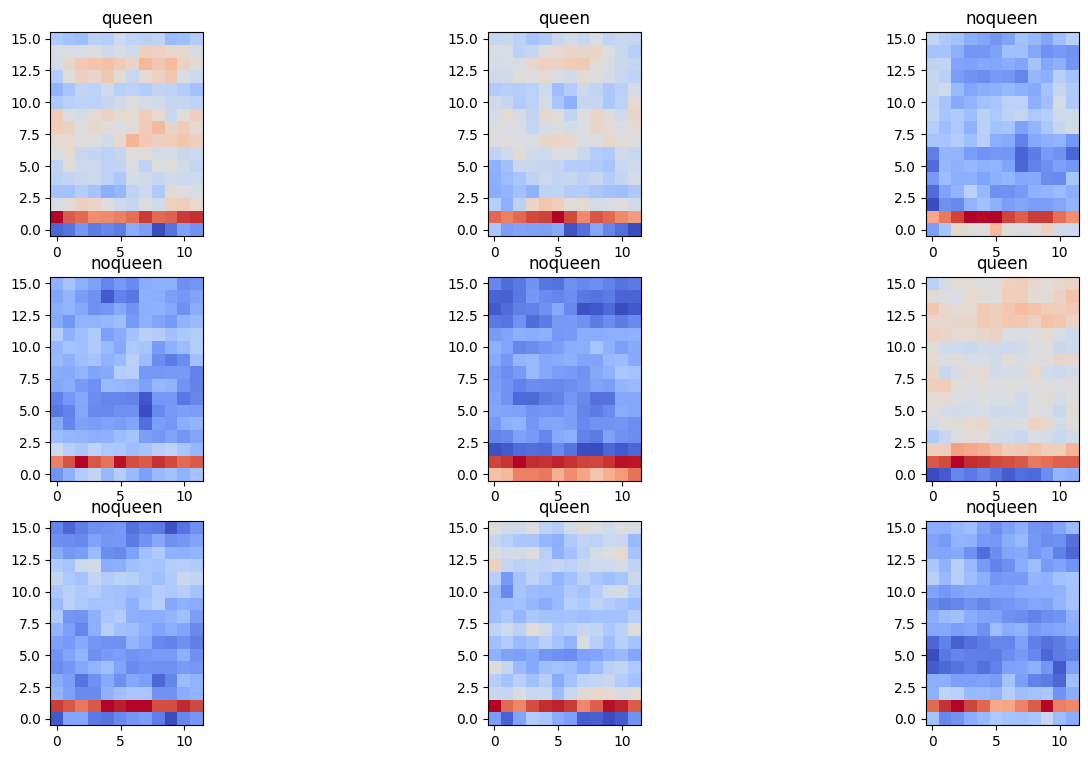

In [68]:
for example_spectrograms, example_spect_labels in train_mfccs_ds.take(1):
  break

input_shape = example_spectrograms.shape[1:]
plot_mfccs(example_spectrograms, example_spect_labels, label_names)

In [69]:
train_mfccs_ds = train_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
val_mfccs_ds = val_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
for example_spectrograms, example_spect_labels in train_mfccs_ds.take(1):
  break
input_shape = example_spectrograms.shape[1:]
input_shape

TensorShape([12, 16, 1])

In [70]:
train_mfccs_ds = train_mfccs_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_mfccs_ds = val_mfccs_ds.cache().prefetch(tf.data.AUTOTUNE)

# Conv

In [71]:
model_conv = get_conv_model(input_shape, len(label_names))
model_conv.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [72]:
history = model_conv.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=20,
    callbacks=callbacks
)

Epoch 1/3
18/18 [==============================] - 1s 38ms/step - loss: 0.6670 - accuracy: 0.6171 - val_loss: 0.5844 - val_accuracy: 0.7664
Epoch 2/3
18/18 [==============================] - 0s 9ms/step - loss: 0.5666 - accuracy: 0.7260 - val_loss: 0.5084 - val_accuracy: 0.8102
Epoch 3/3
18/18 [==============================] - 0s 10ms/step - loss: 0.5242 - accuracy: 0.7568 - val_loss: 0.4683 - val_accuracy: 0.8394


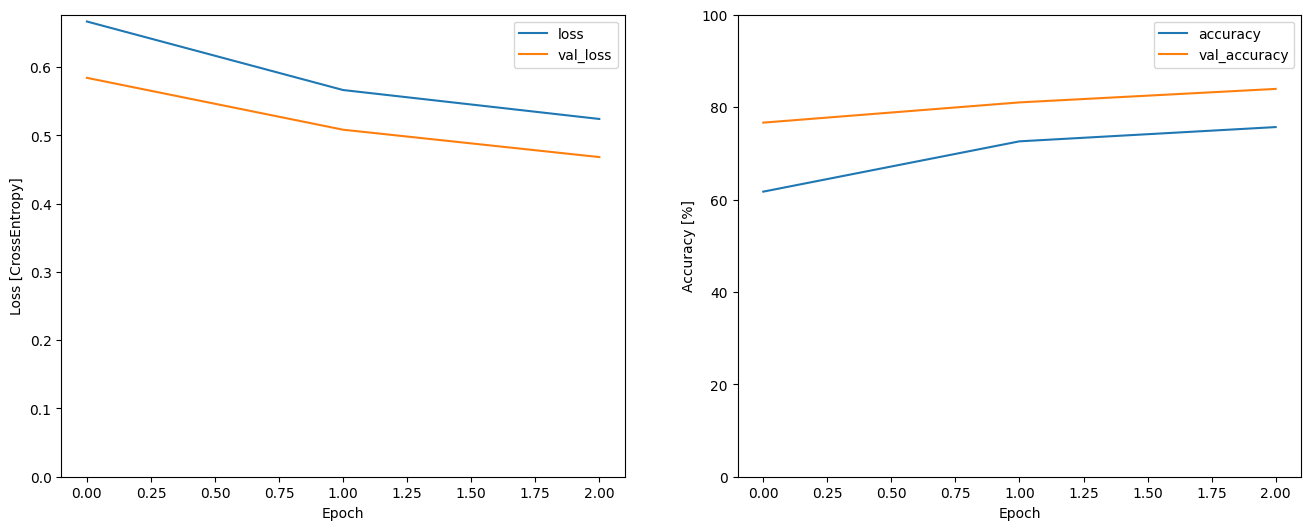

In [73]:
plot_history(history)

# Reinforce

In [50]:
model = tf.keras.models.load_model("osbh.h5")

### Check non-reinforced model perf

In [51]:
results = model.evaluate(val_mfccs_ds)

12/12 [==============================] - 0s 7ms/step - loss: 1.8106 - accuracy: 0.5247


In [52]:
history = model.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=50,
    callbacks=callbacks
)

Epoch 1/25
46/46 [==============================] - 1s 9ms/step - loss: 0.8791 - accuracy: 0.5680 - val_loss: 0.6465 - val_accuracy: 0.5962
Epoch 2/25
46/46 [==============================] - 0s 8ms/step - loss: 0.6166 - accuracy: 0.6607 - val_loss: 0.6349 - val_accuracy: 0.6621
Epoch 3/25
46/46 [==============================] - 0s 8ms/step - loss: 0.6073 - accuracy: 0.6758 - val_loss: 0.6167 - val_accuracy: 0.6538
Epoch 4/25
46/46 [==============================] - 0s 7ms/step - loss: 0.5888 - accuracy: 0.7033 - val_loss: 0.6098 - val_accuracy: 0.6648
Epoch 5/25
46/46 [==============================] - 0s 7ms/step - loss: 0.5791 - accuracy: 0.7005 - val_loss: 0.6047 - val_accuracy: 0.6786
Epoch 6/25
46/46 [==============================] - 0s 7ms/step - loss: 0.5651 - accuracy: 0.7212 - val_loss: 0.6127 - val_accuracy: 0.7033
Epoch 7/25
46/46 [==============================] - 0s 7ms/step - loss: 0.5501 - accuracy: 0.7335 - val_loss: 0.5976 - val_accuracy: 0.6786
Epoch 8/25
46/46 [==

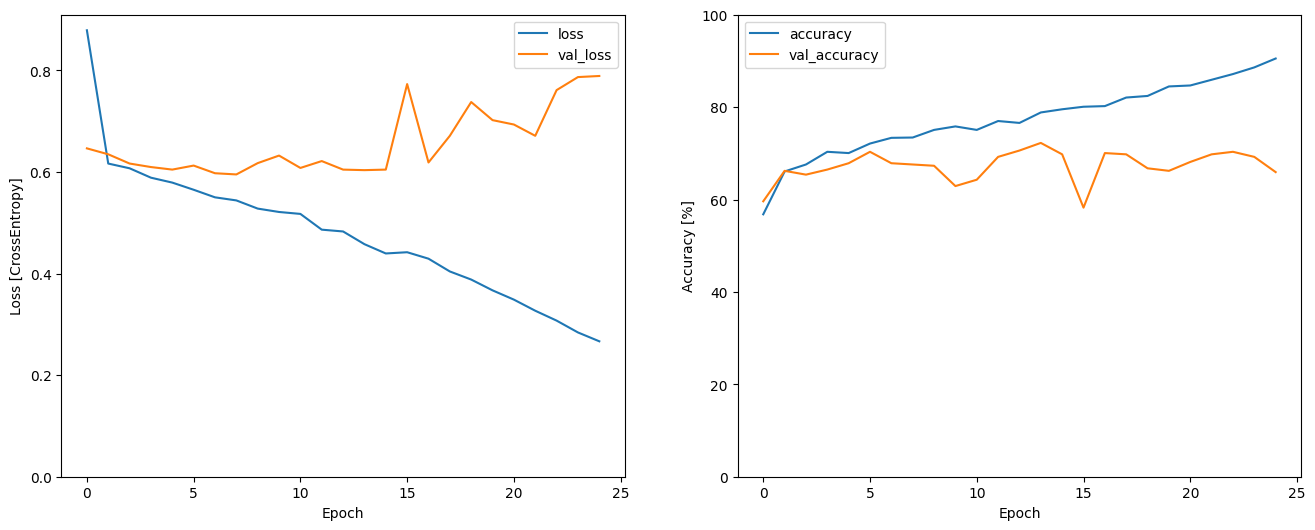

In [53]:
plot_history(history)